In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import itertools
from matplotlib import image as img
from sklearn import metrics, svm
from google.colab import files
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix, f1_score
from sklearn.model_selection import train_test_split, StratifiedKFold

In [ ]:
df = pd.read_csv('loan.csv')
df.head()

,Loan_ID,loan_status,Principal,terms,effective_date,due_date,paid_off_time,past_due_days,age,education,Gender
0,xqd20166231,PAIDOFF,1000,30,9/8/2016,10/7/2016,9/14/2016 19:31,NaN,45,High School or Below,male
1,xqd20168902,PAIDOFF,1000,30,9/8/2016,10/7/2016,10/7/2016 9:00,NaN,50,Bechalor,female
2,xqd20160003,PAIDOFF,1000,30,9/8/2016,10/7/2016,9/25/2016 16:58,NaN,33,Bechalor,female
3,xqd20160004,PAIDOFF,1000,15,9/8/2016,9/22/2016,9/22/2016 20:00,NaN,27,college,male
4,xqd20160005,PAIDOFF,1000,30,9/9/2016,10/8/2016,9/23/2016 21:36,NaN,28,college,female


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Loan_ID         500 non-null    object 
 1   loan_status     500 non-null    object 
 2   Principal       500 non-null    int64  
 3   terms           500 non-null    int64  
 4   effective_date  500 non-null    object 
 5   due_date        500 non-null    object 
 6   paid_off_time   400 non-null    object 
 7   past_due_days   200 non-null    float64
 8   age             500 non-null    int64  
 9   education       500 non-null    object 
 10  Gender          500 non-null    object 
dtypes: float64(1), int64(3), object(7)
memory usage: 43.1+ KB


In [ ]:
df.describe

<bound method NDFrame.describe of          Loan_ID         loan_status  ...             education  Gender
0    xqd20166231             PAIDOFF  ...  High School or Below    male
1    xqd20168902             PAIDOFF  ...              Bechalor  female
2    xqd20160003             PAIDOFF  ...              Bechalor  female
3    xqd20160004             PAIDOFF  ...               college    male
4    xqd20160005             PAIDOFF  ...               college  female
..           ...                 ...  ...                   ...     ...
495  xqd20160496  COLLECTION_PAIDOFF  ...  High School or Below    male
496  xqd20160497  COLLECTION_PAIDOFF  ...  High School or Below    male
497  xqd20160498  COLLECTION_PAIDOFF  ...               college    male
498  xqd20160499  COLLECTION_PAIDOFF  ...               college  female
499  xqd20160500  COLLECTION_PAIDOFF  ...  High School or Below    male

[500 rows x 11 columns]>

In [ ]:
df['education']= df['education'].replace('Bechalor','Bachelor')
df['due_date'] = pd.to_datetime(df['due_date'])
df['effective_date'] = pd.to_datetime(df['effective_date'])
df.head()

,Loan_ID,loan_status,Principal,terms,effective_date,due_date,paid_off_time,past_due_days,age,education,Gender
0,xqd20166231,PAIDOFF,1000,30,2016-09-08,2016-10-07,9/14/2016 19:31,NaN,45,High School or Below,male
1,xqd20168902,PAIDOFF,1000,30,2016-09-08,2016-10-07,10/7/2016 9:00,NaN,50,Bachelor,female
2,xqd20160003,PAIDOFF,1000,30,2016-09-08,2016-10-07,9/25/2016 16:58,NaN,33,Bachelor,female
3,xqd20160004,PAIDOFF,1000,15,2016-09-08,2016-09-22,9/22/2016 20:00,NaN,27,college,male
4,xqd20160005,PAIDOFF,1000,30,2016-09-09,2016-10-08,9/23/2016 21:36,NaN,28,college,female


In [ ]:
df.isna().sum()

Loan_ID             0
loan_status         0
Principal           0
terms               0
effective_date      0
due_date            0
paid_off_time     100
past_due_days     300
age                 0
education           0
Gender              0
dtype: int64

In [ ]:
#Temporarily Filling the empty values in 'past_due_days' as '0'
df['past_due_days'] = df['past_due_days'].fillna(0)
#Filling the empty values in 'paid_off_time' as '-1'
df['paid_off_time'] = df['paid_off_time'].fillna(-1)
#Find the number of missing values in each columns
df.isna().sum()

Loan_ID           0
loan_status       0
Principal         0
terms             0
effective_date    0
due_date          0
paid_off_time     0
past_due_days     0
age               0
education         0
Gender            0
dtype: int64

In [ ]:
#Number of unique values in each column
for cat in df.columns:
    print("Number of levels in category '{0}': \b  {1:2.0f} ".format(cat, df[cat].unique().size))

Number of levels in category 'Loan_ID':   500 
Number of levels in category 'loan_status':    3 
Number of levels in category 'Principal':    6 
Number of levels in category 'terms':    3 
Number of levels in category 'effective_date':    7 
Number of levels in category 'due_date':   25 
Number of levels in category 'paid_off_time':   321 
Number of levels in category 'past_due_days':   34 
Number of levels in category 'age':   33 
Number of levels in category 'education':    4 
Number of levels in category 'Gender':    2 


In [ ]:
#Coverting the following columns to 'datetime'
df['effective_date'] = pd.to_datetime(df['effective_date'])
df['due_date'] = pd.to_datetime(df['due_date'])
df['paid_off_time'] = pd.to_datetime(df['paid_off_time']).dt.date

In [ ]:
#To Convert the 'paid_off_time' column to datetime64 type
df['paid_off_time'] = pd.to_datetime(df['paid_off_time'])
df.head()

,Loan_ID,loan_status,Principal,terms,effective_date,due_date,paid_off_time,past_due_days,age,education,Gender
0,xqd20166231,PAIDOFF,1000,30,2016-09-08,2016-10-07,2016-09-14,0.0,45,High School or Below,male
1,xqd20168902,PAIDOFF,1000,30,2016-09-08,2016-10-07,2016-10-07,0.0,50,Bachelor,female
2,xqd20160003,PAIDOFF,1000,30,2016-09-08,2016-10-07,2016-09-25,0.0,33,Bachelor,female
3,xqd20160004,PAIDOFF,1000,15,2016-09-08,2016-09-22,2016-09-22,0.0,27,college,male
4,xqd20160005,PAIDOFF,1000,30,2016-09-09,2016-10-08,2016-09-23,0.0,28,college,female


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   Loan_ID         500 non-null    object        
 1   loan_status     500 non-null    object        
 2   Principal       500 non-null    int64         
 3   terms           500 non-null    int64         
 4   effective_date  500 non-null    datetime64[ns]
 5   due_date        500 non-null    datetime64[ns]
 6   paid_off_time   500 non-null    datetime64[ns]
 7   past_due_days   500 non-null    float64       
 8   age             500 non-null    int64         
 9   education       500 non-null    object        
 10  Gender          500 non-null    object        
dtypes: datetime64[ns](3), float64(1), int64(3), object(4)
memory usage: 43.1+ KB


In [ ]:
df_fe = df.copy()

In [ ]:
df_fe.head()

,Loan_ID,loan_status,Principal,terms,effective_date,due_date,paid_off_time,past_due_days,age,education,Gender
0,xqd20166231,PAIDOFF,1000,30,2016-09-08,2016-10-07,2016-09-14,0.0,45,High School or Below,male
1,xqd20168902,PAIDOFF,1000,30,2016-09-08,2016-10-07,2016-10-07,0.0,50,Bachelor,female
2,xqd20160003,PAIDOFF,1000,30,2016-09-08,2016-10-07,2016-09-25,0.0,33,Bachelor,female
3,xqd20160004,PAIDOFF,1000,15,2016-09-08,2016-09-22,2016-09-22,0.0,27,college,male
4,xqd20160005,PAIDOFF,1000,30,2016-09-09,2016-10-08,2016-09-23,0.0,28,college,female


In [ ]:
for i in range(len(df_fe[df_fe['loan_status']=="PAIDOFF"])):
    df_fe['past_due_days'][i] = (df_fe['paid_off_time'][i] - df_fe['effective_date'][i] + pd.Timedelta(days=1)).days - df_fe['terms'][i]
df_fe.head(10)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,Loan_ID,loan_status,Principal,terms,effective_date,due_date,paid_off_time,past_due_days,age,education,Gender
0,xqd20166231,PAIDOFF,1000,30,2016-09-08,2016-10-07,2016-09-14,-23.0,45,High School or Below,male
1,xqd20168902,PAIDOFF,1000,30,2016-09-08,2016-10-07,2016-10-07,0.0,50,Bachelor,female
2,xqd20160003,PAIDOFF,1000,30,2016-09-08,2016-10-07,2016-09-25,-12.0,33,Bachelor,female
3,xqd20160004,PAIDOFF,1000,15,2016-09-08,2016-09-22,2016-09-22,0.0,27,college,male
4,xqd20160005,PAIDOFF,1000,30,2016-09-09,2016-10-08,2016-09-23,-15.0,28,college,female
5,xqd20160706,PAIDOFF,300,7,2016-09-09,2016-09-15,2016-09-09,-6.0,35,Master or Above,male
6,xqd20160007,PAIDOFF,1000,30,2016-09-09,2016-10-08,2016-10-07,-1.0,29,college,male
7,xqd20160008,PAIDOFF,1000,30,2016-09-09,2016-10-08,2016-10-05,-3.0,36,college,male
8,xqd20160909,PAIDOFF,1000,30,2016-09-09,2016-10-08,2016-10-08,0.0,28,college,male
9,xqd20160010,PAIDOFF,800,15,2016-09-10,2016-09-24,2016-09-24,0.0,26,college,male


In [ ]:
#Records where the difference in the paid_off_time and effective_date is greater than the terms
df_fe[(df_fe['past_due_days']>0)&(df_fe['loan_status']=='PAIDOFF')]

,Loan_ID,loan_status,Principal,terms,effective_date,due_date,paid_off_time,past_due_days,age,education,Gender
11,xqd20160012,PAIDOFF,1000,15,2016-09-10,2016-10-09,2016-10-09,15.0,39,High School or Below,male
42,xqd20160043,PAIDOFF,1000,7,2016-09-11,2016-09-24,2016-09-24,7.0,31,Bachelor,male
85,xqd20160086,PAIDOFF,1000,30,2016-09-11,2016-11-09,2016-11-09,30.0,33,college,male
109,xqd20160110,PAIDOFF,1000,7,2016-09-11,2016-09-24,2016-09-24,7.0,29,college,male
111,xqd20160112,PAIDOFF,1000,30,2016-09-11,2016-11-09,2016-11-09,30.0,27,college,female
122,xqd20160123,PAIDOFF,1000,15,2016-09-11,2016-10-25,2016-10-25,30.0,20,college,male
137,xqd20160138,PAIDOFF,1000,15,2016-09-11,2016-10-25,2016-10-25,30.0,22,college,male
146,xqd20160147,PAIDOFF,1000,30,2016-09-11,2016-11-09,2016-11-09,30.0,26,college,female
150,xqd20160151,PAIDOFF,1000,15,2016-09-12,2016-10-26,2016-10-26,30.0,29,college,male
165,xqd20160166,PAIDOFF,1000,30,2016-09-12,2016-11-10,2016-11-10,30.0,24,High School or Below,male


In [ ]:
a = df_fe['loan_status'].value_counts()
pd.DataFrame(a)

,loan_status
PAIDOFF,300
COLLECTION,100
COLLECTION_PAIDOFF,100


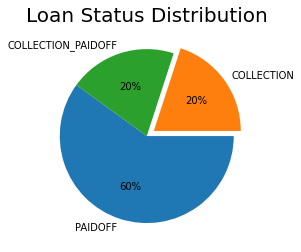

In [ ]:
plt.pie(df_fe['loan_status'].value_counts(),labels=df_fe['loan_status'].unique(),explode=[0,0.1,0],startangle=144,autopct='%1.f%%')
plt.title('Loan Status Distribution',fontsize = 20)
plt.show()

In [ ]:
b= df_fe['Gender'].value_counts()
pd.DataFrame(b)

,Gender
male,423
female,77


In [ ]:
c = df_fe.groupby(['Gender'])['loan_status'].value_counts()
pd.DataFrame(c)

loan_status
Gender loan_status                    
female PAIDOFF                      53
       COLLECTION_PAIDOFF           14
       COLLECTION                   10
male   PAIDOFF                     247
       COLLECTION                   90
       COLLECTION_PAIDOFF           86

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


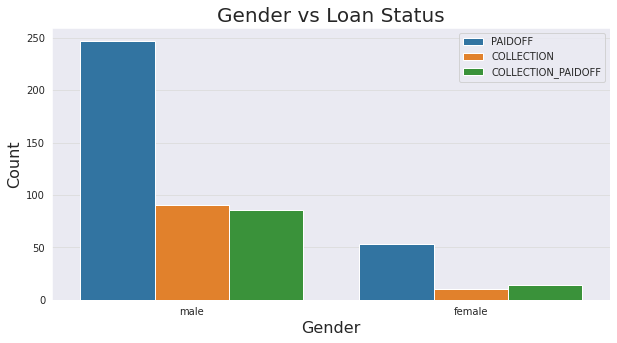

In [ ]:
plt.figure(figsize = [10,5])
sns.set_style('dark')
sns.countplot(df_fe['Gender'],hue=df_fe['loan_status'])
plt.grid(axis='y', color='#dbdbdb')
plt.legend(loc='upper right')
plt.title('Gender vs Loan Status',fontsize=20)
plt.xlabel('Gender', fontsize=16)
plt.ylabel('Count', fontsize=16)
plt.show()

In [ ]:
d = df_fe['education'].value_counts()
pd.DataFrame(d)

,education
college,220
High School or Below,209
Bachelor,67
Master or Above,4


/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


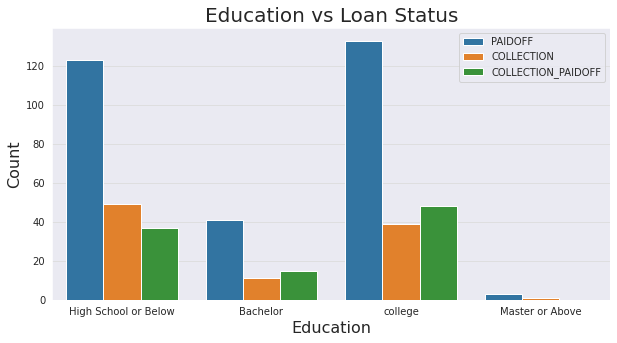

In [ ]:
plt.figure(figsize = [10,5])
sns.countplot(df_fe['education'],hue=df_fe['loan_status'])
plt.grid(axis='y', color='#dbdbdb')
plt.legend(loc='upper right')
plt.title('Education vs Loan Status',fontsize=20)
plt.xlabel('Education', fontsize=16)
plt.ylabel('Count', fontsize=16)
plt.show()

In [ ]:
for i in df_fe['loan_status'].unique():
    agemean=df_fe[df_fe['loan_status']==i]['age'].mean()
    agemode=df_fe[df_fe['loan_status']==i]['age'].mode()
    print("average age of people whose loan status is'{0}': \b {1:2.2f} and mode is {2}".format(i,agemean, agemode[0]))

average age of people whose loan status is'PAIDOFF':  31.21 and mode is 29
average age of people whose loan status is'COLLECTION':  30.61 and mode is 26
average age of people whose loan status is'COLLECTION_PAIDOFF':  31.34 and mode is 26


/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


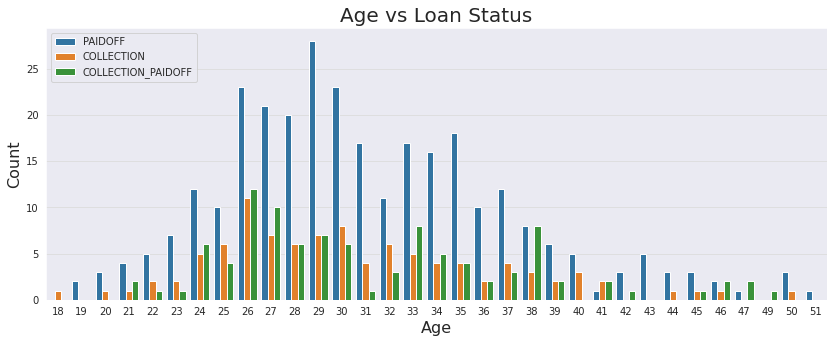

In [ ]:
plt.figure(figsize = [14,5])
sns.countplot(df_fe['age'],hue=df_fe['loan_status'])
plt.grid(axis='y', color='#dbdbdb')
plt.legend(loc='upper left')
plt.title('Age vs Loan Status',fontsize=20)
plt.xlabel('Age', fontsize=16)
plt.ylabel('Count', fontsize=16)
plt.show()

In [ ]:
e = df_fe['Principal'].value_counts()
pd.DataFrame(e)

,Principal
1000,377
800,111
300,6
500,3
900,2
700,1


/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


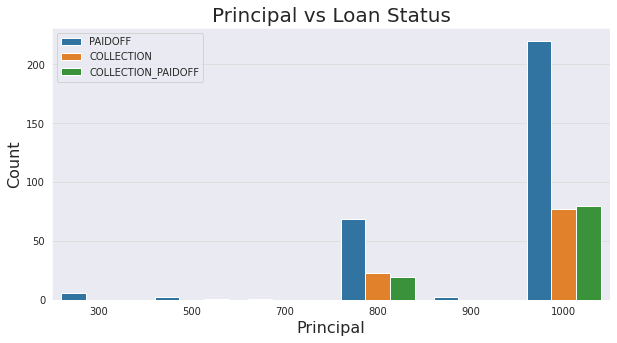

In [ ]:
plt.figure(figsize = [10,5])
sns.countplot(df_fe['Principal'],hue=df_fe['loan_status'])
plt.grid(axis='y', color='#dbdbdb')
plt.legend(loc='upper left')
plt.title('Principal vs Loan Status',fontsize=20)
plt.xlabel('Principal', fontsize=16)
plt.ylabel('Count', fontsize=16)
plt.show()

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


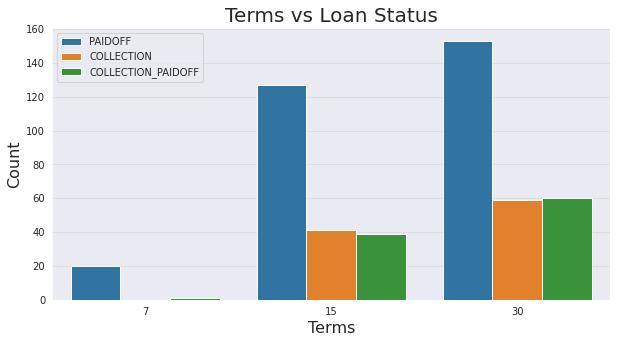

In [ ]:
plt.figure(figsize = [10,5])
sns.countplot(df_fe['terms'],hue=df_fe['loan_status'])
plt.grid(axis='y', color='#dbdbdb')
plt.legend(loc='upper left')
plt.title('Terms vs Loan Status',fontsize=20)
plt.xlabel('Terms', fontsize=16)
plt.ylabel('Count', fontsize=16)
plt.show()

In [ ]:
g = df_fe.groupby(['effective_date'])['loan_status'].value_counts()
pd.DataFrame(g)

loan_status
effective_date loan_status                    
2016-09-08     PAIDOFF                       4
2016-09-09     COLLECTION                    5
               COLLECTION_PAIDOFF            5
               PAIDOFF                       5
2016-09-10     COLLECTION                   20
               PAIDOFF                      19
               COLLECTION_PAIDOFF            7
2016-09-11     PAIDOFF                     119
               COLLECTION                   71
               COLLECTION_PAIDOFF           41
2016-09-12     PAIDOFF                      97
               COLLECTION_PAIDOFF           47
               COLLECTION                    4
2016-09-13     PAIDOFF                      23
2016-09-14     PAIDOFF                      33

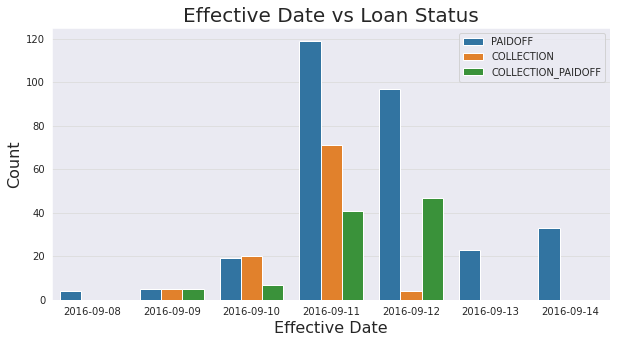

In [ ]:
plt.figure(figsize = [10,5])
dates = df_fe['effective_date'].dt.date
sns.countplot(x=dates, hue=df_fe['loan_status'])
plt.grid(axis='y', color='#dbdbdb')
plt.legend(loc='upper right')
plt.title('Effective Date vs Loan Status',fontsize=20)
plt.xlabel('Effective Date', fontsize=16)
plt.ylabel('Count', fontsize=16)
plt.show()

In [ ]:
df_fe = df_fe.drop(['Loan_ID','effective_date','due_date','paid_off_time'],axis = 1)
df_fe.head()

,loan_status,Principal,terms,past_due_days,age,education,Gender
0,PAIDOFF,1000,30,-23.0,45,High School or Below,male
1,PAIDOFF,1000,30,0.0,50,Bachelor,female
2,PAIDOFF,1000,30,-12.0,33,Bachelor,female
3,PAIDOFF,1000,15,0.0,27,college,male
4,PAIDOFF,1000,30,-15.0,28,college,female


In [ ]:
df_fe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   loan_status    500 non-null    object 
 1   Principal      500 non-null    int64  
 2   terms          500 non-null    int64  
 3   past_due_days  500 non-null    float64
 4   age            500 non-null    int64  
 5   education      500 non-null    object 
 6   Gender         500 non-null    object 
dtypes: float64(1), int64(3), object(3)
memory usage: 27.5+ KB


In [ ]:
p = df_fe.groupby(['loan_status'])['Principal'].value_counts()
pd.DataFrame(p)

Principal
loan_status        Principal           
COLLECTION         1000              77
                   800               23
COLLECTION_PAIDOFF 1000              80
                   800               19
                   500                1
PAIDOFF            1000             220
                   800               69
                   300                6
                   500                2
                   900                2
                   700                1

In [ ]:
df_fe_Pri = df_fe.copy()

In [ ]:
df_fe_Pri.head()

,loan_status,Principal,terms,past_due_days,age,education,Gender
0,PAIDOFF,1000,30,-23.0,45,High School or Below,male
1,PAIDOFF,1000,30,0.0,50,Bachelor,female
2,PAIDOFF,1000,30,-12.0,33,Bachelor,female
3,PAIDOFF,1000,15,0.0,27,college,male
4,PAIDOFF,1000,30,-15.0,28,college,female


In [ ]:
df_fe_Pri[df_fe_Pri['terms']==7]

,loan_status,Principal,terms,past_due_days,age,education,Gender
5,PAIDOFF,300,7,-6.0,35,Master or Above,male
10,PAIDOFF,300,7,-5.0,29,college,male
13,PAIDOFF,900,7,-3.0,26,college,female
14,PAIDOFF,1000,7,-1.0,27,High School or Below,male
42,PAIDOFF,1000,7,7.0,31,Bachelor,male
45,PAIDOFF,800,7,-5.0,35,High School or Below,male
68,PAIDOFF,300,7,-3.0,35,college,male
81,PAIDOFF,1000,7,-4.0,25,college,male
91,PAIDOFF,1000,7,0.0,32,Bachelor,female
100,PAIDOFF,1000,7,0.0,29,High School or Below,male


In [ ]:
df_fe_Pri[(df_fe_Pri['Principal']!=800) &(df_fe_Pri['Principal']!=1000)]

,loan_status,Principal,terms,past_due_days,age,education,Gender
5,PAIDOFF,300,7,-6.0,35,Master or Above,male
10,PAIDOFF,300,7,-5.0,29,college,male
13,PAIDOFF,900,7,-3.0,26,college,female
37,PAIDOFF,700,15,0.0,33,High School or Below,male
65,PAIDOFF,900,15,0.0,28,college,male
68,PAIDOFF,300,7,-3.0,35,college,male
147,PAIDOFF,300,7,0.0,37,Master or Above,male
152,PAIDOFF,500,15,-13.0,23,college,female
181,PAIDOFF,300,7,-1.0,29,High School or Below,male
208,PAIDOFF,300,7,-6.0,23,High School or Below,male


In [ ]:
#Dropping rows where 'Principal' is not equal to 800 and 1000 [12 rows]
df_fe_Pri = df_fe_Pri[(df_fe_Pri['Principal']==800) | (df_fe_Pri['Principal']==1000)]

In [ ]:
#Dropping rows where 'terms' = 7 days [21 rows]
df_fe_Pri = df_fe_Pri[df_fe_Pri['terms']!=7]

In [ ]:
df_fe_Pri.head()

,loan_status,Principal,terms,past_due_days,age,education,Gender
0,PAIDOFF,1000,30,-23.0,45,High School or Below,male
1,PAIDOFF,1000,30,0.0,50,Bachelor,female
2,PAIDOFF,1000,30,-12.0,33,Bachelor,female
3,PAIDOFF,1000,15,0.0,27,college,male
4,PAIDOFF,1000,30,-15.0,28,college,female


In [ ]:
df_fe_Pri.shape

(475, 7)

In [ ]:
df_clean = df_fe_Pri.copy()

In [ ]:
def age_classification(age):
    if age.item()<21:
        return 'Young'
    elif age.item()>=21 and age.item()<31:
        return 'MidAge'
    elif age.item()>=31 and age.item()<41:
        return 'Senior'
    else:
        return 'Older'

In [ ]:
#Categorizing age column
df_clean['age'] = df_clean[['age']].apply(age_classification,axis=1)

In [ ]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 475 entries, 0 to 499
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   loan_status    475 non-null    object 
 1   Principal      475 non-null    int64  
 2   terms          475 non-null    int64  
 3   past_due_days  475 non-null    float64
 4   age            475 non-null    object 
 5   education      475 non-null    object 
 6   Gender         475 non-null    object 
dtypes: float64(1), int64(2), object(4)
memory usage: 29.7+ KB


In [ ]:
df_clean['terms'] = df_clean['terms'].astype('object')
df_clean['Principal'] = df_clean['Principal'].astype('object')

In [ ]:
#Select the variables to be one-hot encoded
one_hot_features = ['education','Gender','Principal','age','terms']
# Convert categorical variables into dummy/indicator variables (i.e. one-hot encoding).
one_hot_encoded = pd.get_dummies(df_clean[one_hot_features],drop_first=True)
one_hot_encoded.info(verbose=True, memory_usage=True, null_counts=True)
# Convert Categorical to Numerical for default column

<class 'pandas.core.frame.DataFrame'>
Int64Index: 475 entries, 0 to 499
Data columns (total 9 columns):
 #   Column                          Non-Null Count  Dtype
---  ------                          --------------  -----
 0   education_High School or Below  475 non-null    uint8
 1   education_Master or Above       475 non-null    uint8
 2   education_college               475 non-null    uint8
 3   Gender_male                     475 non-null    uint8
 4   Principal_1000                  475 non-null    uint8
 5   age_Older                       475 non-null    uint8
 6   age_Senior                      475 non-null    uint8
 7   age_Young                       475 non-null    uint8
 8   terms_30                        475 non-null    uint8
dtypes: uint8(9)
memory usage: 7.9 KB


In [ ]:
one_hot_encoded.head()

,education_High School or Below,education_Master or Above,education_college,Gender_male,Principal_1000,age_Older,age_Senior,age_Young,terms_30
0,1,0,0,1,1,1,0,0,1
1,0,0,0,0,1,1,0,0,1
2,0,0,0,0,1,0,1,0,1
3,0,0,1,1,1,0,0,0,0
4,0,0,1,0,1,0,0,0,1


In [ ]:
df_encoded = pd.concat([df_clean,one_hot_encoded],axis=1)
df_encoded.head()

,loan_status,Principal,terms,past_due_days,age,education,Gender,education_High School or Below,education_Master or Above,education_college,Gender_male,Principal_1000,age_Older,age_Senior,age_Young,terms_30
0,PAIDOFF,1000,30,-23.0,Older,High School or Below,male,1,0,0,1,1,1,0,0,1
1,PAIDOFF,1000,30,0.0,Older,Bachelor,female,0,0,0,0,1,1,0,0,1
2,PAIDOFF,1000,30,-12.0,Senior,Bachelor,female,0,0,0,0,1,0,1,0,1
3,PAIDOFF,1000,15,0.0,MidAge,college,male,0,0,1,1,1,0,0,0,0
4,PAIDOFF,1000,30,-15.0,MidAge,college,female,0,0,1,0,1,0,0,0,1


In [ ]:
df_encoded.drop(['terms','education','Gender','age','Principal'],axis=1,inplace = True)
df_encoded.head()

,loan_status,past_due_days,education_High School or Below,education_Master or Above,education_college,Gender_male,Principal_1000,age_Older,age_Senior,age_Young,terms_30
0,PAIDOFF,-23.0,1,0,0,1,1,1,0,0,1
1,PAIDOFF,0.0,0,0,0,0,1,1,0,0,1
2,PAIDOFF,-12.0,0,0,0,0,1,0,1,0,1
3,PAIDOFF,0.0,0,0,1,1,1,0,0,0,0
4,PAIDOFF,-15.0,0,0,1,0,1,0,0,0,1


In [ ]:
df_clean['loan_status'].unique()

array(['PAIDOFF', 'COLLECTION', 'COLLECTION_PAIDOFF'], dtype=object)

In [ ]:
loan_status_dict = {'PAIDOFF':1,'COLLECTION':2,'COLLECTION_PAIDOFF':3}
df_encoded['loan_status'] = df_encoded.loan_status.map(loan_status_dict)
df_encoded.head()

,loan_status,past_due_days,education_High School or Below,education_Master or Above,education_college,Gender_male,Principal_1000,age_Older,age_Senior,age_Young,terms_30
0,1,-23.0,1,0,0,1,1,1,0,0,1
1,1,0.0,0,0,0,0,1,1,0,0,1
2,1,-12.0,0,0,0,0,1,0,1,0,1
3,1,0.0,0,0,1,1,1,0,0,0,0
4,1,-15.0,0,0,1,0,1,0,0,0,1


In [ ]:
df_model = df_encoded.copy()

In [ ]:
df_model.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 475 entries, 0 to 499
Data columns (total 11 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   loan_status                     475 non-null    int64  
 1   past_due_days                   475 non-null    float64
 2   education_High School or Below  475 non-null    uint8  
 3   education_Master or Above       475 non-null    uint8  
 4   education_college               475 non-null    uint8  
 5   Gender_male                     475 non-null    uint8  
 6   Principal_1000                  475 non-null    uint8  
 7   age_Older                       475 non-null    uint8  
 8   age_Senior                      475 non-null    uint8  
 9   age_Young                       475 non-null    uint8  
 10  terms_30                        475 non-null    uint8  
dtypes: float64(1), int64(1), uint8(9)
memory usage: 15.3 KB


In [ ]:
df_model.head()

,loan_status,past_due_days,education_High School or Below,education_Master or Above,education_college,Gender_male,Principal_1000,age_Older,age_Senior,age_Young,terms_30
0,1,-23.0,1,0,0,1,1,1,0,0,1
1,1,0.0,0,0,0,0,1,1,0,0,1
2,1,-12.0,0,0,0,0,1,0,1,0,1
3,1,0.0,0,0,1,1,1,0,0,0,0
4,1,-15.0,0,0,1,0,1,0,0,0,1


[Text(0.5, 0, 'loan_status'),
 Text(1.5, 0, 'past_due_days'),
 Text(2.5, 0, 'education_High School or Below'),
 Text(3.5, 0, 'education_Master or Above'),
 Text(4.5, 0, 'education_college'),
 Text(5.5, 0, 'Gender_male'),
 Text(6.5, 0, 'Principal_1000'),
 Text(7.5, 0, 'age_Older'),
 Text(8.5, 0, 'age_Senior'),
 Text(9.5, 0, 'age_Young'),
 Text(10.5, 0, 'terms_30')]

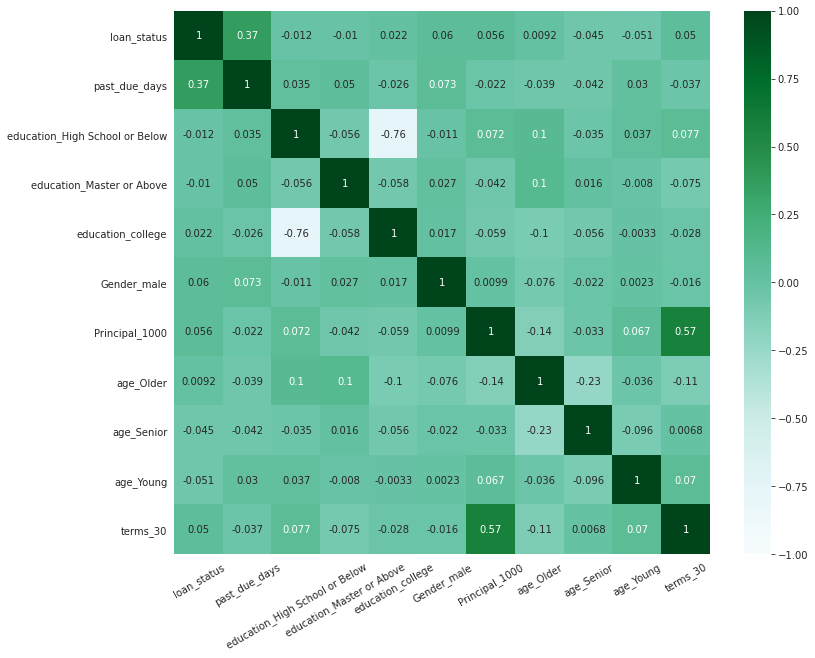

In [ ]:
correlation = df_model[df_model.columns].corr()
plt.figure(figsize=(12, 10))
plot = sns.heatmap(correlation, vmin = -1, vmax = 1,annot=True, annot_kws={"size": 10}, cmap="BuGn")
plot.set_xticklabels(plot.get_xticklabels(), rotation=30)

In [ ]:
X = np.asarray(df_model.drop(['loan_status','past_due_days'],axis=1))
y = np.asarray(df_model['loan_status'])

skf = StratifiedKFold(n_splits=2, shuffle=True, random_state=0)
for train_index, test_index in skf.split(X,y):
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]
    
y_test[0:5]
LogR = LogisticRegression(C=1000,max_iter=500,class_weight='balanced')
model = LogR.fit(X_train, y_train)
yhat = model.predict(X_test)
yhatprob = LogR.predict_proba(X_test)

In [ ]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.RdPu):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    # print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

Confusion matrix, without normalization


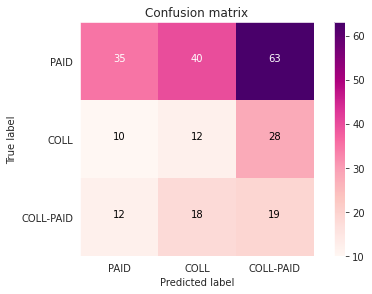

In [ ]:
conf_matrix = confusion_matrix(y_test, yhat, labels=[1,2,3])
plot_confusion_matrix(conf_matrix, classes=['PAID', 'COLL', 'COLL-PAID'])

In [ ]:
report = classification_report(y_test, yhat, labels=[1,2,3])
print(report)

<function classification_report at 0x7fc150bccea0>
